In [13]:
import requests
import pandas as pd
from ipywidgets import interact, widgets, VBox
import matplotlib.pyplot as plt
import numpy as np
import requests
import pandas as pd
import folium
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from pathlib import Path
from dotenv import dotenv_values
import openai
import os
from dotenv import load_dotenv
from rich.console import Console
import matplotlib.dates as mdates

In [21]:
# Load environment variables from .env
load_dotenv('.env')

True

In [22]:
env_variables = dotenv_values('.env')
api_key = env_variables['API_KEY']

In [23]:
# API endpoint + TOKEN
api_url = "https://v6.exchangerate-api.com/v6/e6f9a94f6acf68a21e4a6afd/latest/{base_currency}"

# Fetch currency data
def fetch_currency_data(base_currency):
    url = api_url.format(base_currency=base_currency)
    response = requests.get(url)
    print("", response.status_code)
    data = response.json()
    return data

# Define the base currency
base_currency = "USD"

# Generate currency data for base currency
currency_data = fetch_currency_data(base_currency)

# Get the conversion rates
conversion_rates = currency_data.get("conversion_rates")

# Set the maximum number of rows to display
pd.set_option('display.max_rows', None)

# Convert the conversion rates to a DataFrame
df = pd.DataFrame(list(conversion_rates.items()), columns=["Currency", "Rate"])

# Display the DataFrame
df

 200


,Currency,Rate
0,USD,1.0000
1,AED,3.6725
2,AFN,85.9773
3,ALL,95.2219
4,AMD,386.7095
5,ANG,1.7900
6,AOA,832.5157
7,ARS,260.9391
8,AUD,1.4997
9,AWG,1.7900


In [18]:
# Define the currency conversion function
def convert_currency(base_currency, target_currency, amount):
    if target_currency in currency_data['conversion_rates']:
        exchange_rate = currency_data['conversion_rates'][target_currency]
        converted_amount = amount * exchange_rate
        return converted_amount
    else:
        return None

# Currency conversion input function
def currency_conversion_input():
    print()
    base_currency = input("Enter the base currency: ")
    target_currency = input("Enter the target currency: ")
    amount = float(input("Enter the amount: "))

    converted_amount = convert_currency(base_currency, target_currency, amount)
    if converted_amount is not None:
        print(f"{amount:.2f} {base_currency} is equal to {converted_amount:.2f} {target_currency}")
    else:
        print(f"The currency {target_currency} is not available in the fetched data.")

# Run the currency conversion input function
currency_conversion_input()
print()

Enter the base currency:  USD
Enter the target currency:  GBP
Enter the amount:  10


10.00 USD is equal to 7.80 GBP



In [4]:
# Define country codes and their corresponding coordinates
country_coordinates = {
    "US": [37.0902, -95.7129],  # United States Dollar (USD)
    "EU": [48.8566, 2.3522],    # Euro (EUR)
    "JP": [35.6895, 139.6917],  # Japanese Yen (JPY)
    "GB": [55.3781, -3.4360],   # British Pound Sterling (GBP)
    "CH": [46.8182, 8.2275],    # Swiss Franc (CHF)
    "AU": [-25.2744, 133.7751], # Australian Dollar (AUD)
    "CA": [56.1304, -106.3468], # Canadian Dollar (CAD)
    "CN": [35.8617, 104.1954],  # Chinese Yuan (CNY)
    "NZ": [-40.9006, 174.8860], # New Zealand Dollar (NZD)
    "SE": [60.1282, 18.6435],   # Swedish Krona (SEK)
    "NO": [60.4720, 8.4689],    # Norwegian Krone (NOK)
    "KR": [35.9078, 127.7669],  # South Korean Won (KRW)
    "SG": [1.3521, 103.8198],   # Singapore Dollar (SGD)
    "HK": [22.3193, 114.1694],  # Hong Kong Dollar (HKD)
    "IN": [20.5937, 78.9629],   # Indian Rupee (INR)
    "BR": [-14.2350, -51.9253], # Brazilian Real (BRL)
    "RU": [61.5240, 105.3188],  # Russian Ruble (RUB)
    "ZA": [-30.5595, 22.9375],  # South African Rand (ZAR)
    "MX": [23.6345, -102.5528], # Mexican Peso (MXN)
    "TR": [38.9637, 35.2433],   # Turkish Lira (TRY)
    "SA": [23.8859, 45.0792],   # Saudi Arabian Riyal (SAR)
    "AE": [23.4241, 53.8478],   # United Arab Emirates Dirham (AED)
    "TH": [15.8700, 100.9925],  # Thai Baht (THB)
    "ID": [-0.7893, 113.9213],  # Indonesian Rupiah (IDR)
    "MY": [4.2105, 101.9758],   # Malaysian Ringgit (MYR)
    "PL": [51.9194, 19.1451],   # Polish Złoty (PLN)
    "DK": [56.2639, 9.5018],    # Danish Krone (DKK)
    "IL": [31.0461, 34.8516],   # Israeli Shekel (ILS)
    "AR": [-38.4161, -63.6167], # Argentine Peso (ARS)
    "EG": [26.8206, 30.8025],   # Egyptian Pound (EGP)
}

# Create the folium map
map_center = [30, 0]  # Set the center of the map
zoom_level = 2  # Set the zoom level
map_object = folium.Map(location=map_center, zoom_start=zoom_level)

# Iterate + add markers to the map
for index, row in df.iterrows():
    currency = row["Currency"]
    rate = row["Rate"]
    country_code = currency[:2]  # Extract the country code from the currency
    if country_code in country_coordinates:
        coordinates = country_coordinates[country_code]
        popup_text = f"Currency: {currency}<br>Exchange Rate: {rate:.2f}"
        folium.Marker(location=coordinates, popup=popup_text).add_to(map_object)

# Display the map
map_object

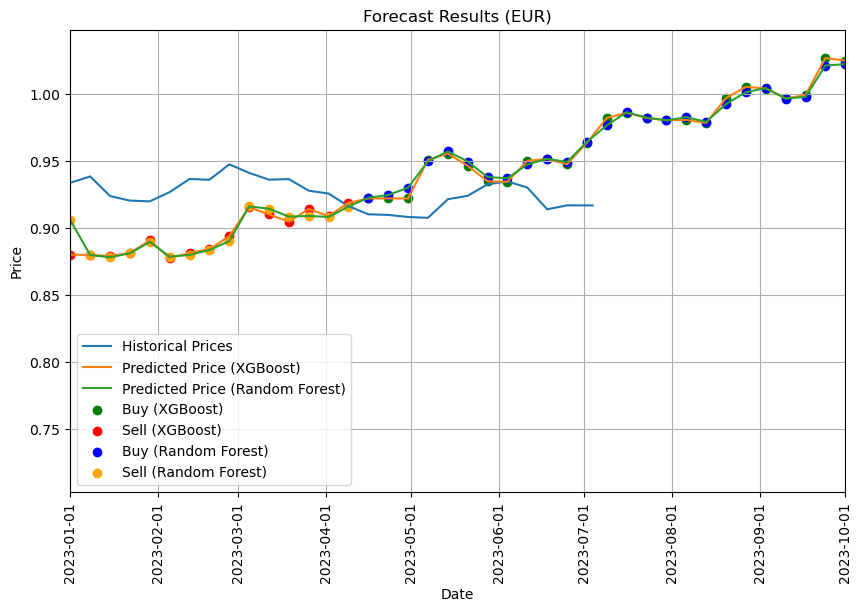

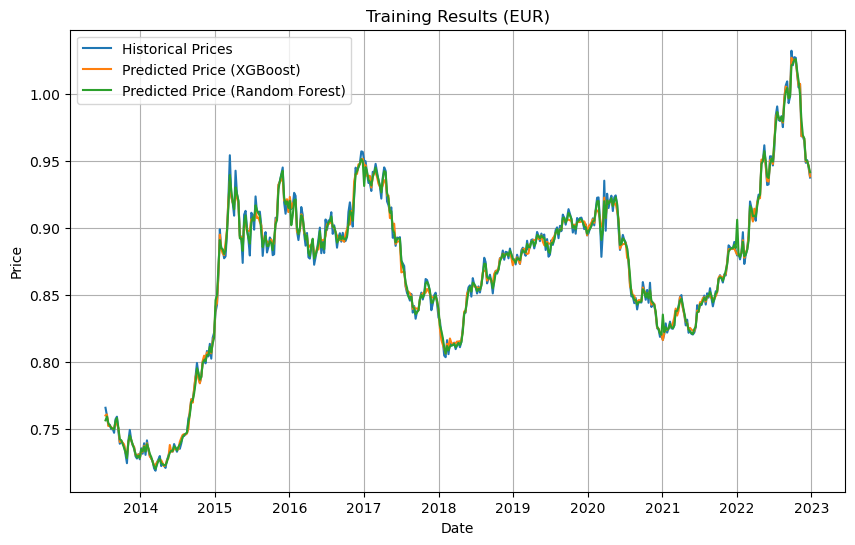

XGBoost Predicted Prices and Signals (EUR):
         Date  Predicted Price (XGBoost) Signal (XGBoost)
0  2023-01-01                   0.880081             Sell
1  2023-01-08                   0.879873             Sell
2  2023-01-15                   0.879111             Sell
3  2023-01-22                   0.881254             Sell
4  2023-01-29                   0.890651             Sell
5  2023-02-05                   0.877519             Sell
6  2023-02-12                   0.881337             Sell
7  2023-02-19                   0.884064             Sell
8  2023-02-26                   0.893933             Sell
9  2023-03-05                   0.915374             Sell
10 2023-03-12                   0.910109             Sell
11 2023-03-19                   0.904629             Sell
12 2023-03-26                   0.914166             Sell
13 2023-04-02                   0.908779             Sell
14 2023-04-09                   0.918757             Sell
15 2023-04-16               

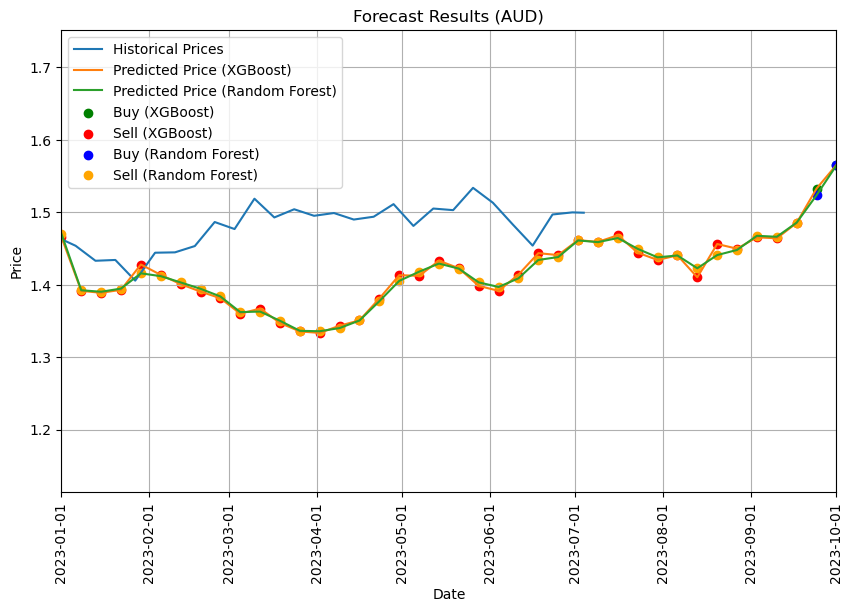

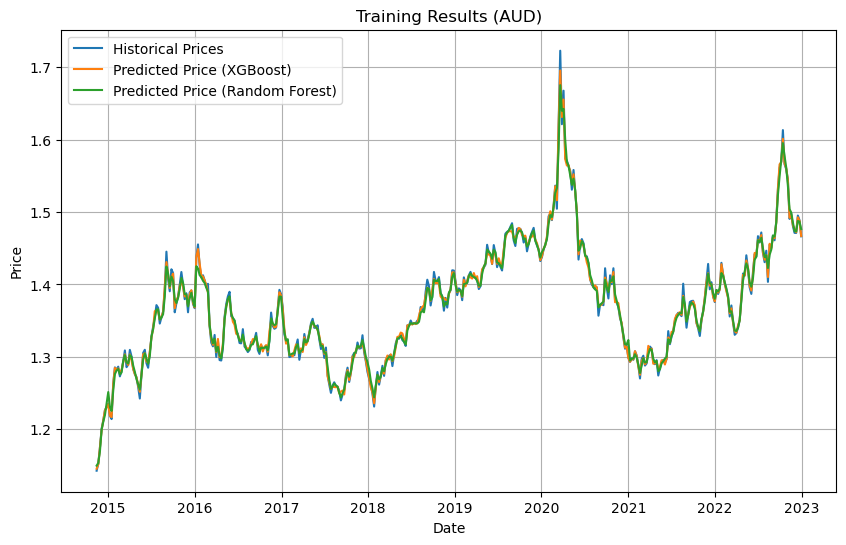

XGBoost Predicted Prices and Signals (AUD):
         Date  Predicted Price (XGBoost) Signal (XGBoost)
0  2023-01-01                   1.465921             Sell
1  2023-01-08                   1.391513             Sell
2  2023-01-15                   1.388853             Sell
3  2023-01-22                   1.392947             Sell
4  2023-01-29                   1.427919             Sell
5  2023-02-05                   1.413590             Sell
6  2023-02-12                   1.400849             Sell
7  2023-02-19                   1.390508             Sell
8  2023-02-26                   1.381362             Sell
9  2023-03-05                   1.360045             Sell
10 2023-03-12                   1.367063             Sell
11 2023-03-19                   1.347194             Sell
12 2023-03-26                   1.335489             Sell
13 2023-04-02                   1.333432             Sell
14 2023-04-09                   1.343424             Sell
15 2023-04-16               

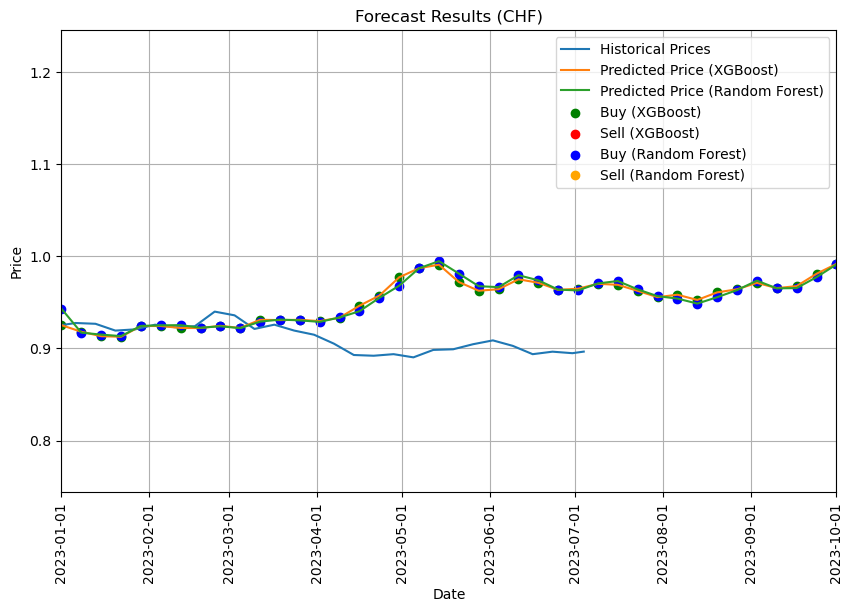

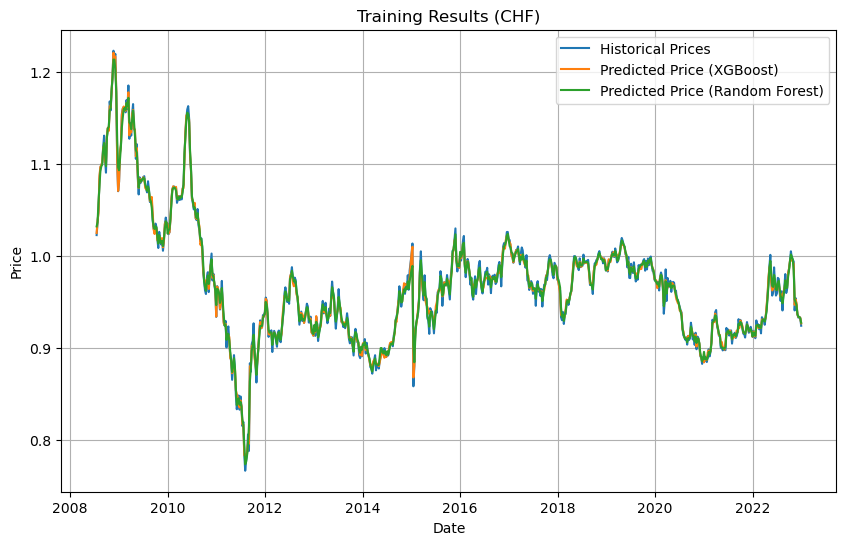

XGBoost Predicted Prices and Signals (CHF):
         Date  Predicted Price (XGBoost) Signal (XGBoost)
0  2023-01-01                   0.925195              Buy
1  2023-01-08                   0.918049              Buy
2  2023-01-15                   0.913182              Buy
3  2023-01-22                   0.912578              Buy
4  2023-01-29                   0.924253              Buy
5  2023-02-05                   0.924253              Buy
6  2023-02-12                   0.922100              Buy
7  2023-02-19                   0.922071              Buy
8  2023-02-26                   0.924464              Buy
9  2023-03-05                   0.922137              Buy
10 2023-03-12                   0.930995              Buy
11 2023-03-19                   0.930680              Buy
12 2023-03-26                   0.930964              Buy
13 2023-04-02                   0.929555              Buy
14 2023-04-09                   0.933304              Buy
15 2023-04-16               

In [30]:
# Define the list of file paths
file_paths = [
    "./WEEKLY-FOREX/forex_data_EUR.csv",
    "./WEEKLY-FOREX/forex_data_AUD.csv",
    "./WEEKLY-FOREX/forex_data_CHF.csv"
]

# Define rolling window size
rolling_window = 52

# Prepare the models
xgb_model = XGBRegressor()
rf_model = RandomForestRegressor()

# Perform model training + rolling window cross-validation
xgb_scores = []
rf_scores = []

for file_path in file_paths:
    # Extract the currency from the file path
    currency = file_path.split("/")[-1].split("_")[2].split(".")[0]

    # Load the data
    data = pd.read_csv(file_path, parse_dates=['DATE'], index_col='DATE')

    # Prepare the data
    target_data = data[['CLOSE']].copy()
    target_data['WEEK_NUM'] = target_data.index.isocalendar().week.astype(int)
    target_data['MONTH'] = target_data.index.month
    target_data['YEAR'] = target_data.index.year
    target_data.fillna(method='ffill', inplace=True)
    target_data = target_data.sort_index()
    train_data = target_data.loc['2000-01-01':'2022-12-31']

    test_data = target_data.loc['2023-01-01':]

    # # Split the data into training and testing sets
    # train_split = train_data.iloc[rolling_window:]
    # test_split = train_data.iloc[rolling_window:]

    # Fit the models
    xgb_model.fit(train_data.drop(columns='CLOSE'), train_data['CLOSE'])
    rf_model.fit(train_data.drop(columns='CLOSE'), train_data['CLOSE'])

    # Make predictions
    xgb_predictions = xgb_model.predict(test_data.drop(columns='CLOSE'))
    rf_predictions = rf_model.predict(test_data.drop(columns='CLOSE'))

    # Calculate RMSE score
    xgb_rmse = np.sqrt(mean_squared_error(test_data['CLOSE'], xgb_predictions))
    rf_rmse = np.sqrt(mean_squared_error(test_data['CLOSE'], rf_predictions))

    xgb_scores.append(xgb_rmse)
    rf_scores.append(rf_rmse)

    # Generate future dates for prediction
    prediction_dates = pd.date_range(start='2023-01-01', end='2023-10-01', freq='W')
    X_pred = pd.DataFrame(index=prediction_dates)
    X_pred['WEEK_NUM'] = X_pred.index.isocalendar().week.astype(int)
    X_pred['MONTH'] = X_pred.index.month
    X_pred['YEAR'] = X_pred.index.year
    
    # Make predictions for the future dates
    xgb_predictions = xgb_model.predict(X_pred)
    rf_predictions = rf_model.predict(X_pred)
    
    # Generate DataFrames with predicted prices and dates for each model
    xgb_results = pd.DataFrame({'Date': prediction_dates, 'Predicted Price (XGBoost)': xgb_predictions})
    rf_results = pd.DataFrame({'Date': prediction_dates, 'Predicted Price (Random Forest)': rf_predictions})
    
    # Define the threshold as a %
    threshold_percentage = 0.5
    
    # Calculate the threshold value
    threshold = target_data['CLOSE'].iloc[-1] * (1 + threshold_percentage / 100)
    
    # Add buy/sell signals based on comparison with the threshold
    xgb_results['Signal (XGBoost)'] = np.where(xgb_results['Predicted Price (XGBoost)'] > threshold, 'Buy', 'Sell')
    rf_results['Signal (Random Forest)'] = np.where(rf_results['Predicted Price (Random Forest)'] > threshold, 'Buy', 'Sell')
    
    # Plot the forecast results
    plt.figure(figsize=(10, 6))
    plt.plot(target_data.index, target_data['CLOSE'], label='Historical Prices')
    plt.plot(xgb_results['Date'], xgb_results['Predicted Price (XGBoost)'], label='Predicted Price (XGBoost)')
    plt.plot(rf_results['Date'], rf_results['Predicted Price (Random Forest)'], label='Predicted Price (Random Forest)')
    plt.scatter(xgb_results[xgb_results['Signal (XGBoost)'] == 'Buy']['Date'], xgb_results[xgb_results['Signal (XGBoost)'] == 'Buy']['Predicted Price (XGBoost)'], color='green', label='Buy (XGBoost)')
    plt.scatter(xgb_results[xgb_results['Signal (XGBoost)'] == 'Sell']['Date'], xgb_results[xgb_results['Signal (XGBoost)'] == 'Sell']['Predicted Price (XGBoost)'], color='red', label='Sell (XGBoost)')
    plt.scatter(rf_results[rf_results['Signal (Random Forest)'] == 'Buy']['Date'], rf_results[rf_results['Signal (Random Forest)'] == 'Buy']['Predicted Price (Random Forest)'], color='blue', label='Buy (Random Forest)')
    plt.scatter(rf_results[rf_results['Signal (Random Forest)'] == 'Sell']['Date'], rf_results[rf_results['Signal (Random Forest)'] == 'Sell']['Predicted Price (Random Forest)'], color='orange', label='Sell (Random Forest)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=90)
    plt.title(f'Forecast Results ({currency})')
    

    
    # Convert the date strings to datetime objects
    start_date = pd.to_datetime('2023-01-01')
    end_date = pd.to_datetime('2023-10-01')
    
    # Convert datetime objects to numerical values
    start_num = mdates.date2num(start_date)
    end_num = mdates.date2num(end_date)
    
    plt.xlim(start_num, end_num)  
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the x-axis tick labels
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot the training results
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['CLOSE'], label='Historical Prices')
    plt.plot(train_data.index, xgb_model.predict(train_data.drop(columns='CLOSE')), label='Predicted Price (XGBoost)')
    plt.plot(train_data.index, rf_model.predict(train_data.drop(columns='CLOSE')), label='Predicted Price (Random Forest)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Training Results ({currency})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # # Plot the forecast results
    # plt.figure(figsize=(10, 6))
    # plt.plot(target_data.index, target_data['CLOSE'], label='Historical Prices')
    # plt.plot(xgb_results['Date'], xgb_results['Predicted Price (XGBoost)'], label='Predicted Price (XGBoost)')
    # plt.plot(rf_results['Date'], rf_results['Predicted Price (Random Forest)'], label='Predicted Price (Random Forest)')
    # plt.scatter(xgb_results[xgb_results['Signal (XGBoost)'] == 'Buy']['Date'], xgb_results[xgb_results['Signal (XGBoost)'] == 'Buy']['Predicted Price (XGBoost)'], color='green', label='Buy (XGBoost)')
    # plt.scatter(xgb_results[xgb_results['Signal (XGBoost)'] == 'Sell']['Date'], xgb_results[xgb_results['Signal (XGBoost)'] == 'Sell']['Predicted Price (XGBoost)'], color='red', label='Sell (XGBoost)')
    # plt.scatter(rf_results[rf_results['Signal (Random Forest)'] == 'Buy']['Date'], rf_results[rf_results['Signal (Random Forest)'] == 'Buy']['Predicted Price (Random Forest)'], color='blue', label='Buy (Random Forest)')
    # plt.scatter(rf_results[rf_results['Signal (Random Forest)'] == 'Sell']['Date'], rf_results[rf_results['Signal (Random Forest)'] == 'Sell']['Predicted Price (Random Forest)'], color='orange', label='Sell (Random Forest)')
    # plt.xlabel('Date')
    # plt.ylabel('Price')
    # plt.title(f'Forecast Results ({currency})')
    # plt.xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2024-10-01'))  # Set the x-axis limits for the specified date range
    # plt.legend()
    # plt.grid(True)
    # plt.show()

    # Print the predicted prices and signals for XGBoost
    xgb_combined_results = xgb_results[['Date', 'Predicted Price (XGBoost)', 'Signal (XGBoost)']]
    print(f"XGBoost Predicted Prices and Signals ({currency}):\n{xgb_combined_results}\n")

    # Print the predicted prices and signals for Random Forest
    rf_combined_results = rf_results[['Date', 'Predicted Price (Random Forest)', 'Signal (Random Forest)']]
    print(f"Random Forest Predicted Prices and Signals ({currency}):\n{rf_combined_results}\n")

    # Calculate the average RMSE scores
    xgb_avg_rmse = np.mean(xgb_scores)
    rf_avg_rmse = np.mean(rf_scores)

    # Print the average RMSE scores for XGBoost and Random Forest
    print(f"XGBoost Average RMSE ({currency}): {xgb_avg_rmse}")
    print(f"Random Forest Average RMSE ({currency}): {rf_avg_rmse}\n")

# Print the average RMSE scores
for file_path, xgb_rmse, rf_rmse in zip(file_paths, xgb_scores, rf_scores):
    currency = file_path.split("/")[-1].split("_")[2].split(".")[0]
    print(f"XGBoost Average RMSE ({currency}): {xgb_rmse}")
    print(f"Random Forest Average RMSE ({currency}): {rf_rmse}\n")

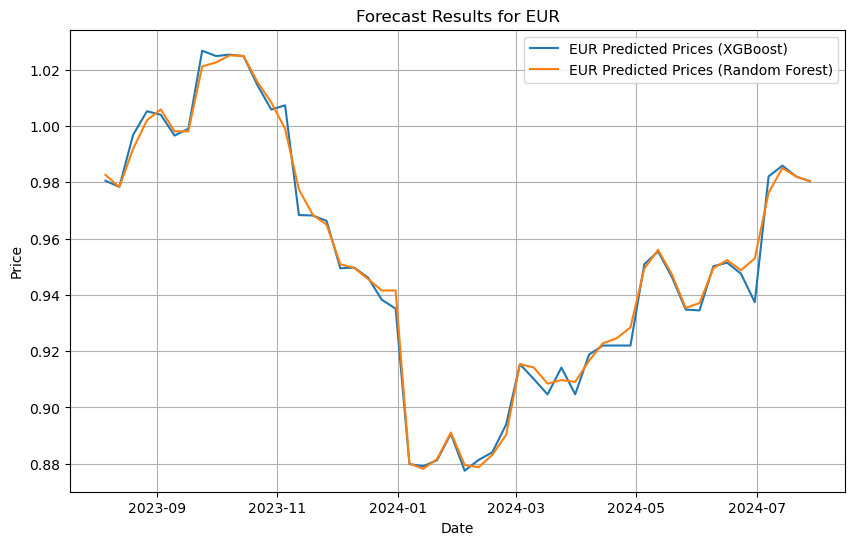

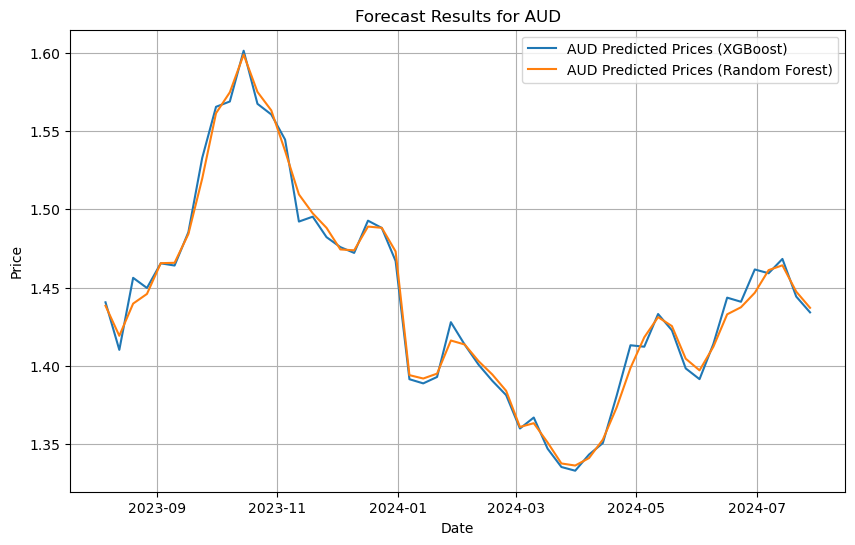

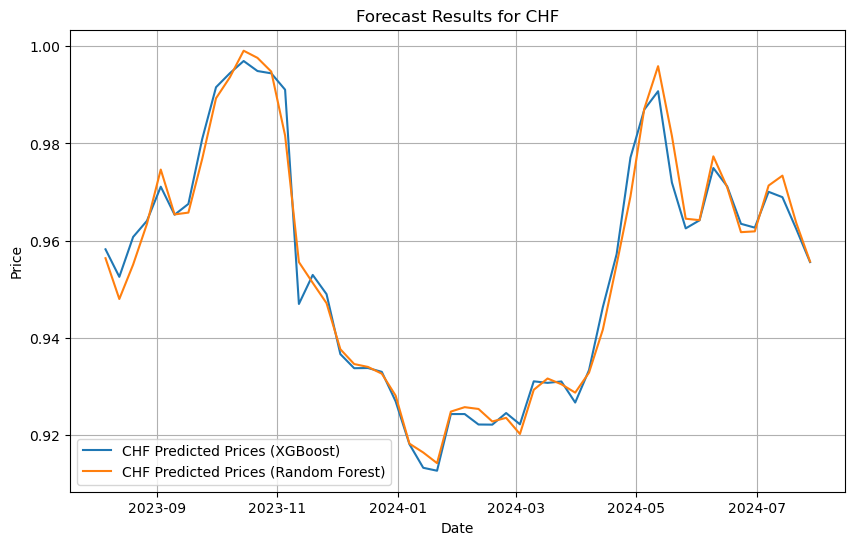


The currency with the most buy signals: CHF

The currency with the highest cumulative percentage change to USD: EUR

The currency with the best investment outlook is: EUR


In [32]:
# Define weights for buy signals + cumulative change in %
buy_signals_weight = 0.7
cumulative_change_weight = 0.3

# Define a dictionary to store forecast results (for each currency)
forecast_results = {}

# Prepare the models
xgb_model = XGBRegressor()
rf_model = RandomForestRegressor()

# Loop through each file path
for file_path in file_paths:
    # Extract the currency from the file path
    currency = file_path.split("/")[-1].split("_")[2].split(".")[0]

    # Load the data
    data = pd.read_csv(file_path, parse_dates=['DATE'], index_col='DATE')

    # Prepare the data
    target_data = data[['CLOSE']].copy()
    target_data['WEEK_NUM'] = target_data.index.isocalendar().week.astype(int)
    target_data['MONTH'] = target_data.index.month
    target_data['YEAR'] = target_data.index.year
    target_data.fillna(method='ffill', inplace=True)
    target_data = target_data.sort_index()
    train_data = target_data.loc['2000-01-01':'2022-12-31']

    # Fit the models
    xgb_model.fit(train_data.drop(columns='CLOSE'), train_data['CLOSE'])
    rf_model.fit(train_data.drop(columns='CLOSE'), train_data['CLOSE'])

    # Generate future dates for prediction
    prediction_dates = pd.date_range(start='2023-08-01', end='2024-08-01', freq='W')
    X_pred = pd.DataFrame(index=prediction_dates)
    X_pred['WEEK_NUM'] = X_pred.index.isocalendar().week.astype(int)
    X_pred['MONTH'] = X_pred.index.month
    X_pred['YEAR'] = X_pred.index.year

    # Make predictions for the future dates
    xgb_predictions = xgb_model.predict(X_pred)
    rf_predictions = rf_model.predict(X_pred)

    # Generate DataFrames with predicted prices and dates for each model
    xgb_results = pd.DataFrame({'Date': prediction_dates, 'Predicted Price (XGBoost)': xgb_predictions})
    rf_results = pd.DataFrame({'Date': prediction_dates, 'Predicted Price (Random Forest)': rf_predictions})

    # Add buy/sell signals based on comparison with historical prices
    historical_prices = target_data['CLOSE'].values
    xgb_results['Signal'] = np.where(xgb_results['Predicted Price (XGBoost)'] > historical_prices[-1], 'Buy', 'Sell')
    rf_results['Signal'] = np.where(rf_results['Predicted Price (Random Forest)'] > historical_prices[-1], 'Buy', 'Sell')

    # Store the forecast results in the dictionary
    forecast_results[currency] = (xgb_results, rf_results)

# Plot the forecast results for each currency
for currency, (xgb_results, rf_results) in forecast_results.items():
    plt.figure(figsize=(10, 6))
    plt.plot(xgb_results['Date'], xgb_results['Predicted Price (XGBoost)'],
             label=f'{currency} Predicted Prices (XGBoost)')
    plt.plot(rf_results['Date'], rf_results['Predicted Price (Random Forest)'],
             label=f'{currency} Predicted Prices (Random Forest)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Forecast Results for {currency}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{currency}_forecast_plot.png")  # Save the plot as a PNG file
    plt.show()

# Determine the currency with the most buy signals
buy_signals = {currency: xgb_results['Signal'].value_counts()['Buy'] for currency, (xgb_results, _) in forecast_results.items()}
most_buy_signals = max(buy_signals, key=buy_signals.get)

# Print the currency with the most buy signals
print()
print("The currency with the most buy signals:", most_buy_signals)

# Calculate the percentage change in each currency's value relative to USD
usd_conversion = {currency: xgb_results['Predicted Price (XGBoost)'] / xgb_results['Predicted Price (XGBoost)'].iloc[0] for currency, (xgb_results, _) in forecast_results.items()}

# Calculate the cumulative percentage change over the forecasted period
cumulative_change = {currency: (usd_conversion[currency].iloc[-1] - 1) * 100 for currency in usd_conversion}

# Determine the currency with the highest cumulative percentage change
highest_cumulative_percentage_change = max(cumulative_change, key=cumulative_change.get)

# Print the currency with the highest cumulative percentage change
print()
print("The currency with the highest cumulative percentage change to USD:", highest_cumulative_percentage_change)


# Extract values from the buy_signals dictionary
buy_signal_values = list(buy_signals.values())

# Normalise the buy signals
normalized_buy_signals = buy_signal_values / max(buy_signal_values)

# Extract values from the cumulative_change dictionary
cumulative_change_values = list(cumulative_change.values())

# Normalise the cumulative change
normalized_cumulative_change = (cumulative_change_values - min(cumulative_change_values)) / (max(cumulative_change_values) - min(cumulative_change_values))

# Calculate combined score
combined_score = dict(zip(buy_signals.keys(), (normalized_buy_signals * buy_signals_weight) + (normalized_cumulative_change * cumulative_change_weight)))

# Determine the best currency
best_currency = max(combined_score, key=combined_score.get)

# Print the currency with the best investment outlook
print()
print("The currency with the best investment outlook is:", best_currency)

In [11]:
# Load environment variables from .env file
load_dotenv('.env')

# Set up OpenAI API key
openai.api_key = os.getenv("OPENAI_API_KEY")

# Define the chatbot function
def chatbot():
    console = Console()
    chatbot_name = "ONE WORLD CURRENCY Chatbot"
    chatbot_name_style = Style(color="blue", bold=True, underline=False)
    console.print()
    console.print(chatbot_name, style=chatbot_name_style)
    console.print("Hello! How can I assist you today?")
    
    while True:
        print()
        user_input = input("User: ")
        print()
        
        # Check if the user wants to exit
        if user_input.lower() in ['exit', 'quit', 'bye']:
            console.print(chatbot_name, style=chatbot_name_style)
            console.print("Thank you for using ONE WORLD CURRENCY Chatbot!")
            break
        
        # Generate response from the OpenAI API
        response = openai.Completion.create(
            engine="text-davinci-003",
            prompt=user_input,
            max_tokens=100,
            temperature=0.5,
            n=1,
            stop=None,
            timeout=10,
        )
        
        # Extract the generated response
        chatbot_response = response.choices[0].text.strip()
        
        console.print(chatbot_name, style=chatbot_name_style)
        console.print(chatbot_response)

# Execute the chatbot
chatbot()

ONE WORLD CURRENCY Chatbot

Hello! How can I assist you today?

User:  what is the least volatile currency historically


ONE WORLD CURRENCY Chatbot

The Swiss Franc is generally considered to be the least volatile currency historically.

User:  what is the most volatile currency historically


ONE WORLD CURRENCY Chatbot

The most volatile currency historically is the Venezuelan Bolivar. Due to the country's economic crisis, the 
Bolivar has experienced extreme volatility, with its value plummeting to nearly 0 in 2020.

User:  bye


ONE WORLD CURRENCY Chatbot

Thank you for using ONE WORLD CURRENCY Chatbot!